# México Wolrd Cup Goals Confidence Interval
In this notebook/project I extract World Cup goals data from [The Fjelstul World Cup Database](https://github.com/jfjelstul/worldcup), and work with  
it to calculate a confidence interval of 95%.  
This project is made for my statistics class in Univerisad de Sonora
# Importing Modules
Here we import the following modules in order to clean the database, extract the amount of goals made  
by the Mexico World Cup team, obtain difrent graphs of the data and calulate the confidence interval

In [19]:
import pandas as pd
import numpy as np
import pylab 
import scipy.stats as stats

# Import data
Here we import the necessary data directly from its github repository source: [Fjelstul's World Cup Goals Data](https://github.com/jfjelstul/worldcup/blob/master/data-csv/goals.csv).  
  
And we save this in a pandas dataframe.

In [2]:
url = 'https://github.com/jfjelstul/worldcup/blob/master/data-csv/goals.csv?raw=true'
df = pd.read_csv(url, index_col=0)
print(df.head(5))

# Data Filtering
We extract the goals only made by the México team.


In [8]:
df_filtered = df[df['team_name'] == "Mexico"]
 
print(df_filtered.head())
print(df_filtered.shape)

We group and count the goals by their "tournament_id".

In [7]:
cleanDF = df_filtered.groupby('tournament_id', as_index=False).size()
print(cleanDF)

   tournament_id  size
0        WC-1930     4
1        WC-1950     2
2        WC-1954     2
3        WC-1958     1
4        WC-1962     3
5        WC-1966     1
6        WC-1970     6
7        WC-1978     2
8        WC-1986     6
9        WC-1994     4
10       WC-1998     8
11       WC-2002     4
12       WC-2006     5
13       WC-2010     4
14       WC-2014     5
15       WC-2018     3


We extract the size, which is our goals array we'll work with.

In [37]:
goalsArray = np.array(cleanDF['size'])
print(goalsArray)

[4 2 2 1 3 1 6 2 6 4 8 4 5 4 5 3]


# Graphs
Here we plot the data in a qqplot to see if it is normally distributed.  
As we can see, it's normally distributed.

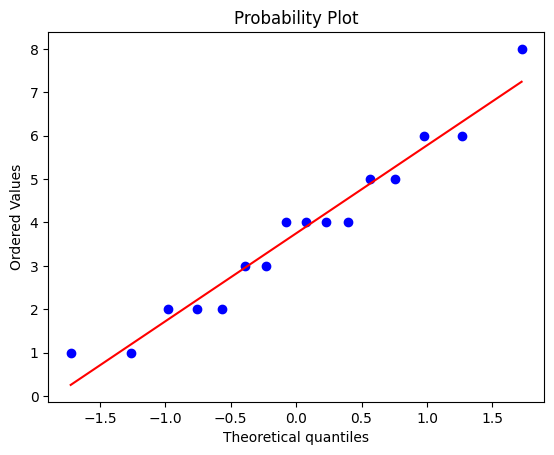

In [40]:
stats.probplot(goalsArray, dist="norm", plot=pylab)
pylab.savefig("Plots/MexGoals_qqplot.png")
pylab.show()

We also plot the data in a histogram to see the distribution of the data.

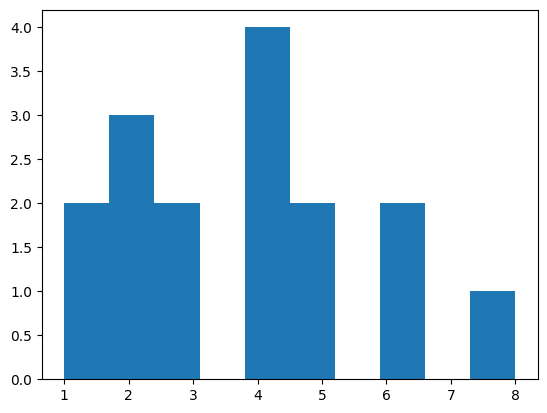

In [41]:
pylab.hist(goalsArray)
pylab.savefig("Plots/MexGoals_hist.png")

# Calculating the Confidence Interval
First we get the size of the data.  
Then we calculate the mean of the data.  
And then we calculate the standard deviation of the data.  

For our confidence interval we consider a 95% confidence level, so we use the z-score of 1.96.

In [53]:
goalsN = len(goalsArray)
print("N: " + str(goalsN))
goalsMean = np.mean(goalsArray)
print("Mean: " + str(goalsMean))
goalsStd = np.std(goalsArray)
print("Sd: " + str(goalsStd))
z = 1.96
print("Z: " + str(z))

N: 16
Mean: 3.75
Sd: 1.8874586088176875
Z: 1.96


In [54]:
inf = goalsMean - z * (goalsStd / np.sqrt(goalsN))
sup = goalsMean + z * (goalsStd / np.sqrt(goalsN))

print ("Confidence interval: (" + str(inf) + " - " + str(sup) + ")")

Confidence interval: (2.825145281679333 - 4.674854718320667)


# Result
Therefore we can reassure with a 95% confidence that the average goals made by the México World Cup team is  
between 2.82 and 4.67.
